In [144]:
import matplotlib.patheffects as path_effects
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statistics
import math

In [159]:
colors = pd.read_csv('data/TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

storDF =  pd.read_csv(
    'storDF.tsv',
    sep = '\t',
    
)

filter_list = list(storDF.Cohort)
filtered_colors = colors[colors.Cohort.isin(filter_list)]
filtered_colors.reset_index(
    inplace = True,
    drop = True
)

col_lst = list(filtered_colors.Hexi)

In [67]:
# For error bars
fin_vals = pd.read_csv(
    'fin_val_lsts.tsv',
    sep = '\t'
)

In [82]:
# Unified object for plotting simplicity
merge = storDF.copy()
merge['Scores'] = fin_vals.Scores
merge.head()

In [110]:
errs = []
for i in merge.Scores:
    scr_lst = eval(i)
    err = statistics.stdev(scr_lst)
    errs.append(err)

In [ ]:
# Jitter values
y_val_list = [storDF.Peak_val] # Labels error

vert_shift_list = [
    -0.008, # blca down
    0,
    0.0085, # coad up
    0.004, # GEA up
    0.002, # hnsc
    
    0,
    0,
    -0., 
    -0.004,# luad down
    0,
    
    0,
    0.0045, # prad
    -0.008, # skcm
    0,
    0   
]

h_shft = .0058

horz_shft_list = [
    0.003, # blca 
    h_shft,
    0.003, # coad
    .004, # GEA
    h_shft,
    
    h_shft,
    h_shft,
    h_shft, 
    h_shft,# luad
    h_shft,
    
    h_shft,
    h_shft,
    h_shft, 
    h_shft,
    h_shft,       
]

face_cols = [
    'white',
    'white',
    'white',
    'white',
    'white',
    
    'white',
    'white',
    'white',
    'white',
    'white',
    
    'white',
    'white',
    'white',
    'white',
    'white',
]

alphalist = [
    .1,
    .1, #Brca
    .1,
    .1,
    .1,
    
    .1, # kirk
    .1,
    .1, #lihc
    .1, #luad
    .1,
    
    .1, #ov
    .1, #prad
    .1, # skcm
    .1, # thca
    .1, # ucec
]

In [148]:
CI_upper = []
CI_lower = []
CI_range = []
n = 100
for i, score_set in enumerate(merge.Scores):
    xbar = round(statistics.mean(eval(score_set)), 3)
    z = 1.96 # 95%
    s = statistics.stdev(eval(score_set))
    CI_up = xbar + z * (s/math.sqrt(n))
    CI_upper.append(CI_up)
    CI_low = xbar - z * (s/math.sqrt(n))
    CI_lower.append(CI_low)
    CI_range.append(z * (s/math.sqrt(n)))

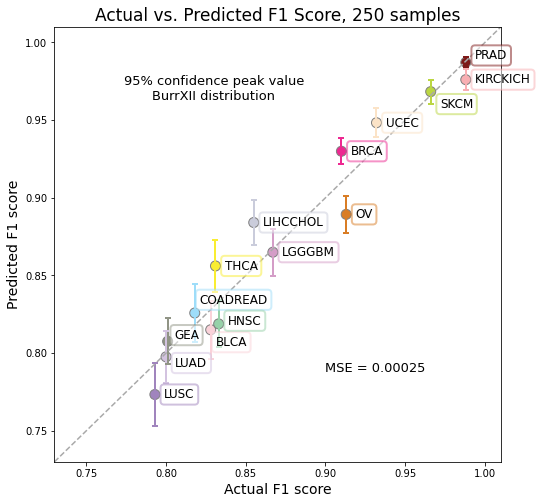

In [165]:
y_val = merge.Peak_val
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = 'darkgrey',
       linestyle = '--')

for i, actl_val in enumerate(merge.Actl_val):
    ax.errorbar(
        actl_val,
        y_val[i],
        yerr = CI_range[i],
        ecolor = col_lst[i],
        ls = '',
        elinewidth = 2,
        capthick = 2,
        capsize = 3
    )

ax.scatter(merge.Actl_val,
           y_val,
           color = filtered_colors.Hexi,               

          s = 100,
           edgecolors = 'grey'
          )

plt.ylabel('Predicted F1 score', size = 14)
plt.xlabel('Actual F1 score', size = 14)
plt.title(
    'Actual vs. Predicted F1 Score, 250 samples',
    size = 17
)

for i in merge.index:

    cohort = filter_list[i]
    color_row = colors[colors.Cohort == cohort]
    color_row.reset_index(
        inplace = True,
        drop = True
    )
    color = color_row.iloc[0, 1]

    text = ax.text(
        merge.iloc[i,5] + horz_shft_list[i],
        y_val[i]+vert_shift_list[i],
        merge.iloc[i,1],
        va = 'center', color = 'black',

#         weight='bold',
        fontsize = 12,
        bbox=dict(
            facecolor=face_cols[i],
            alpha=.5,
            boxstyle = 'round',
            ec = color,
            lw = 2)
    )

ax.set_xlim(.73,1.01)
ax.set_ylim(.73,1.01)
ax.text(
        .9,
        .79,
        'MSE = ' + str(round(mean_squared_error(storDF.Actl_val, y_val),5)),
        va = 'center', fontsize = 13
    )

ax.text(
    .83,
    .97,
    '95% confidence peak value\nBurrXII distribution',
    va = 'center', ha = 'center', fontsize = 13
)

plt.savefig(
    'labels_error/panel_C.png',
    dpi = 400
)

# End 2021-10-22